In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"   #(xxxx is your specific GPU ID)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway,ttest_ind

# Group model

In [3]:
Perfomance_group = pd.read_csv('Performance_0608_training_Data_Size.csv')
Perfomance_group = Perfomance_group[(Perfomance_group["Size"]=='10')|(Perfomance_group["Size"]=='20')|(Perfomance_group["Size"]=='30')|(Perfomance_group["Size"]=='20&s2_30')]
Perfomance_group = Perfomance_group.rename({"Acc_p6": "Command_Acc_p6", "Acc_p7": "Command_Acc_p7","Acc_p8": "Command_Acc_p8",}, axis='columns')

In [4]:
Perfomance_group.groupby(['Model','Size']).mean()

Time  Partcp_Acc_p15  Command_Acc_p15  Partcp_Acc_p1  \
Model Size                                                                  
Group 10        45.011133         0.96907          0.95157         0.9946   
      20        57.061598         0.99154          0.97477         0.9910   
      20&s2_30  63.185908         0.99263          0.98067         0.9847   
      30        74.408518         0.99301          0.98434         0.9829   

                Command_Acc_p1  Partcp_Acc_p2  Command_Acc_p2  Partcp_Acc_p3  \
Model Size                                                                     
Group 10               0.94684        0.91759         0.87869        0.97738   
      20               0.97030        0.98795         0.92779        0.99217   
      20&s2_30         0.97300        0.99907         0.95370        0.99391   
      30               0.98560        0.99444         0.95832        0.99739   

                Command_Acc_p3  Partcp_Acc_p4  Command_Acc_p4  Partcp_Acc_p5  \
Model Size                                                                     
Group 10               0.96607        0.95963         0.97706          0.997   
      20               0.98869        0.98715         0.98898          1.000   
      20&s2_30         0.98956        0.98624         0.98807          1.000   
      30               0.98956        0.99080         0.98898          1.000   

                Command_Acc_p5  Command_Acc_p6  Command_Acc_p7  Command_Acc_p8  
Model Size                                                                      
Group 10                 0.991           0.636          0.4944         0.30591  
      20                 0.999           0.695          0.4504         0.28017  
      20&s2_30           1.000           0.687          0.4560         0.29304  
      30                 1.000           0.694          0.4288         0.26235

In [5]:
T_DATA = []
P_DATA = []

##  [10,10,10,10,20] vs [20,20,20,20,20]

In [6]:
# [10,10,10,10,20] vs [20,20,20,20,20]
Ttest_T = ["[10,10,10,10,20] vs [20,20,20,20,20]"]
Ttest_P = ["[10,10,10,10,20] vs [20,20,20,20,20]"]

for n in range(1,6):
    # performance on #n 
    size_10 = Perfomance_group[Perfomance_group['Size']=='10']["Command_Acc_p"+str(n)]
    size_20 = Perfomance_group[Perfomance_group['Size']=='20']["Command_Acc_p"+str(n)]
    size_230 = Perfomance_group[Perfomance_group['Size']=='20&s2_30']["Command_Acc_p"+str(n)]
    size_30 = Perfomance_group[Perfomance_group['Size']=='30']["Command_Acc_p"+str(n)]
    T, p_value = ttest_ind(size_10, size_20)
    Ttest_T.append(round(T,4))
    Ttest_P.append(round(p_value,4))       
for n in range(1,6):
    # performance on #n 
    size_10 = Perfomance_group[Perfomance_group['Size']=='10']["Partcp_Acc_p"+str(n)]
    size_20 = Perfomance_group[Perfomance_group['Size']=='20']["Partcp_Acc_p"+str(n)]
    size_230 = Perfomance_group[Perfomance_group['Size']=='20&s2_30']["Partcp_Acc_p"+str(n)]
    size_30 = Perfomance_group[Perfomance_group['Size']=='30']["Partcp_Acc_p"+str(n)]
    T, p_value = ttest_ind(size_10, size_20)
    Ttest_T.append(round(T,4))
    Ttest_P.append(round(p_value,4))        
T_DATA.append(Ttest_T)
P_DATA.append(Ttest_P)

##  [20,20,20,20,20] vs [20,30,20,20,20]

In [7]:
# [20,20,20,20,20] vs [20,30,20,20,20]
Ttest_T = ["[20,20,20,20,20] vs [20,30,20,20,20]"]
Ttest_P = ["[20,20,20,20,20] vs [20,30,20,20,20]"]

for n in range(1,6):
    # performance on #n 
    size_10 = Perfomance_group[Perfomance_group['Size']=='10']["Command_Acc_p"+str(n)]
    size_20 = Perfomance_group[Perfomance_group['Size']=='20']["Command_Acc_p"+str(n)]
    size_230 = Perfomance_group[Perfomance_group['Size']=='20&s2_30']["Command_Acc_p"+str(n)]
    size_30 = Perfomance_group[Perfomance_group['Size']=='30']["Command_Acc_p"+str(n)]
    T, p_value = ttest_ind(size_20, size_30)
    Ttest_T.append(round(T,4))
    Ttest_P.append(round(p_value,4))         
for n in range(1,6):
    # performance on #n 
    size_10 = Perfomance_group[Perfomance_group['Size']=='10']["Partcp_Acc_p"+str(n)]
    size_20 = Perfomance_group[Perfomance_group['Size']=='20']["Partcp_Acc_p"+str(n)]
    size_230 = Perfomance_group[Perfomance_group['Size']=='20&s2_30']["Partcp_Acc_p"+str(n)]
    size_30 = Perfomance_group[Perfomance_group['Size']=='30']["Partcp_Acc_p"+str(n)]
    T, p_value = ttest_ind(size_20, size_30)
    Ttest_T.append(round(T,4))
    Ttest_P.append(round(p_value,4))       
T_DATA.append(Ttest_T)
P_DATA.append(Ttest_P)

##  [20,30,20,20,20] vs [30,30,30,30,30]

In [8]:
# [20,30,20,20,20] vs [30,30,30,30,30]
Ttest_T = ["[20,30,20,20,20] vs [30,30,30,30,30]"]
Ttest_P = ["[20,30,20,20,20] vs [30,30,30,30,30]"]

for n in range(1,6):
    # performance on #n 
    size_10 = Perfomance_group[Perfomance_group['Size']=='10']["Command_Acc_p"+str(n)]
    size_20 = Perfomance_group[Perfomance_group['Size']=='20']["Command_Acc_p"+str(n)]
    size_230 = Perfomance_group[Perfomance_group['Size']=='20&s2_30']["Command_Acc_p"+str(n)]
    size_30 = Perfomance_group[Perfomance_group['Size']=='30']["Command_Acc_p"+str(n)]
    T, p_value = ttest_ind(size_230, size_30)
    Ttest_T.append(round(T,4))
    Ttest_P.append(round(p_value,4))          

for n in range(1,6):
    # performance on #n 
    size_10 = Perfomance_group[Perfomance_group['Size']=='10']["Partcp_Acc_p"+str(n)]
    size_20 = Perfomance_group[Perfomance_group['Size']=='20']["Partcp_Acc_p"+str(n)]
    size_230 = Perfomance_group[Perfomance_group['Size']=='20&s2_30']["Partcp_Acc_p"+str(n)]
    size_30 = Perfomance_group[Perfomance_group['Size']=='30']["Partcp_Acc_p"+str(n)]
    T, p_value = ttest_ind(size_230, size_30)
    Ttest_T.append(round(T,4))
    Ttest_P.append(round(p_value,4))         
T_DATA.append(Ttest_T)
P_DATA.append(Ttest_P)

In [9]:
T_DATA = pd.DataFrame(np.array(T_DATA),columns =["two group","key_sub_1","key_sub_2","key_sub_3","key_sub_4","key_sub_5",
                                                   "spk_sub_1","spk_sub_2","spk_sub_3","spk_sub_4","spk_sub_5",])
T_DATA.round(4)

,two group,key_sub_1,key_sub_2,key_sub_3,key_sub_4,key_sub_5,spk_sub_1,spk_sub_2,spk_sub_3,spk_sub_4,spk_sub_5
0,"[10,10,10,10,20] vs [20,20,20,20,20]",-7.429,-9.7828,-9.3228,-2.6245,-5.6569,1.8091,-16.5446,-4.1231,-4.6938,-1.964
1,"[20,20,20,20,20] vs [20,30,20,20,20]",-6.3258,-5.9024,-0.3974,0.0,-1.0,3.8571,-1.7471,-3.2863,-1.8068,nan
2,"[20,30,20,20,20] vs [30,30,30,30,30]",-3.7717,-0.8293,0.0,-0.4932,nan,0.5721,1.7553,-1.8516,-2.2328,nan


In [10]:
P_DATA = pd.DataFrame(np.array(P_DATA),columns =["two group","key_sub_1","key_sub_2","key_sub_3","key_sub_4","key_sub_5",
                                                   "spk_sub_1","spk_sub_2","spk_sub_3","spk_sub_4","spk_sub_5",])
P_DATA.round(4)

,two group,key_sub_1,key_sub_2,key_sub_3,key_sub_4,key_sub_5,spk_sub_1,spk_sub_2,spk_sub_3,spk_sub_4,spk_sub_5
0,"[10,10,10,10,20] vs [20,20,20,20,20]",0.0,0.0,0.0,0.0172,0.0,0.0872,0.0,0.0006,0.0002,0.0652
1,"[20,20,20,20,20] vs [20,30,20,20,20]",0.0,0.0,0.6958,1.0,0.3306,0.0012,0.0977,0.0041,0.0875,nan
2,"[20,30,20,20,20] vs [30,30,30,30,30]",0.0014,0.4178,1.0,0.6278,nan,0.5743,0.0962,0.0806,0.0385,nan


In [11]:
T_DATA = T_DATA.iloc[:,1:].astype('float64')
T_DATA

,key_sub_1,key_sub_2,key_sub_3,key_sub_4,key_sub_5,spk_sub_1,spk_sub_2,spk_sub_3,spk_sub_4,spk_sub_5
0,-7.4290,-9.7828,-9.3228,-2.6245,-5.6569,1.8091,-16.5446,-4.1231,-4.6938,-1.964
1,-6.3258,-5.9024,-0.3974,0.0000,-1.0000,3.8571,-1.7471,-3.2863,-1.8068,NaN
2,-3.7717,-0.8293,0.0000,-0.4932,NaN,0.5721,1.7553,-1.8516,-2.2328,NaN


In [12]:
P_DATA = P_DATA.set_index('two group')

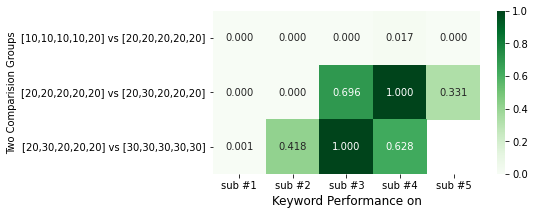

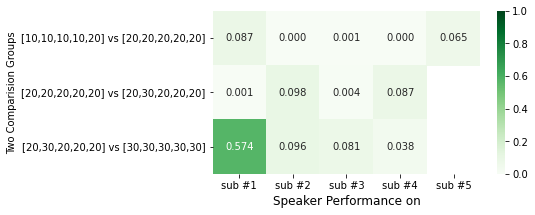

In [18]:
plt.figure(figsize=(6,3))
sns.heatmap(P_DATA.iloc[:,0:5].astype('float64'),cmap="Greens",annot=True,vmin=0,vmax=1, fmt='.3f')
plt.ylabel("Two Comparision Groups")
plt.xlabel("Keyword Performance on",fontsize=12)
plt.xticks(np.array(range(5))+0.5,["sub #1","sub #2","sub #3","sub #4","sub #5"],rotation=0)
plt.show()

plt.figure(figsize=(6,3))
sns.heatmap(P_DATA.iloc[:,5:].astype('float64'),cmap="Greens",annot=True,vmin=0,vmax=1, fmt='.3f')
plt.ylabel("Two Comparision Groups")
plt.xlabel("Speaker Performance on",fontsize=12)
plt.xticks(np.array(range(5))+0.5,["sub #1","sub #2","sub #3","sub #4","sub #5"],rotation=0)
plt.show()

# Singel models

In [14]:
Perfomance_single = pd.read_csv('Performance_0608_single_model.csv')
Perfomance_single = Perfomance_single.rename({"Acc_p6": "Command_Acc_p6", "Acc_p7": "Command_Acc_p7","Acc_p8": "Command_Acc_p8",}, axis='columns')

In [15]:
Perfomance_single.groupby(['Model','Size']).mean()

Time  Command_Acc_p15  Command_Acc_p1  Command_Acc_p2  \
Model    Size                                                               
Subjet_1 10    13.585376          0.60626         0.93782         0.34165   
         20    15.606864          0.64310         0.98380         0.37870   
         30    16.123639          0.67165         0.99820         0.42871   
Subjet_2 10    13.406044          0.39870         0.21982         0.84815   
         20    15.362367          0.41434         0.24683         0.91110   
         30    16.783955          0.45580         0.28649         0.93889   
Subjet_3 10    13.381846          0.63702         0.51621         0.39630   
         20    14.573935          0.64144         0.48199         0.38055   
         30    15.451992          0.64013         0.49280         0.35836   
Subjet_4 10    13.433266          0.64182         0.56756         0.41481   
         20    15.024560          0.64052         0.56217         0.39723   
         30    16.085143          0.67883         0.59819         0.47128   
Subjet_5 10    12.767522          0.60424         0.48830         0.32871   
         20    14.086614          0.60499         0.50270         0.28981   
         30    14.294672          0.61860         0.53242         0.25277   

               Command_Acc_p3  Command_Acc_p4  Command_Acc_p5  Command_Acc_p6  \
Model    Size                                                                   
Subjet_1 10           0.51565         0.60461           0.630           0.382   
         20           0.56520         0.64955           0.633           0.388   
         30           0.57042         0.69450           0.663           0.398   
Subjet_2 10           0.31912         0.33580           0.272           0.182   
         20           0.31131         0.31927           0.286           0.208   
         30           0.34695         0.39264           0.316           0.234   
Subjet_3 10           0.99391         0.63579           0.622           0.378   
         20           0.99391         0.66880           0.665           0.375   
         30           0.99217         0.69175           0.647           0.358   
Subjet_4 10           0.60957         0.97525           0.643           0.279   
         20           0.57478         0.98442           0.691           0.264   
         30           0.62784         0.99080           0.711           0.308   
Subjet_5 10           0.58347         0.68809           0.963           0.270   
         20           0.58869         0.68623           0.989           0.313   
         30           0.61651         0.73394           0.986           0.346   

               Command_Acc_p7  Command_Acc_p8  
Model    Size                                  
Subjet_1 10            0.3928         0.26829  
         20            0.3904         0.23958  
         30            0.3528         0.21681  
Subjet_2 10            0.3008         0.28908  
         20            0.3360         0.28512  
         30            0.3448         0.29799  
Subjet_3 10            0.4640         0.30195  
         20            0.4104         0.26829  
         30            0.3968         0.25839  
Subjet_4 10            0.2528         0.26631  
         20            0.2096         0.29106  
         30            0.2328         0.27621  
Subjet_5 10            0.3104         0.33264  
         20            0.3408         0.29205  
         30            0.2936         0.30195

In [16]:
# keyword performance
Anova_F = []
Anova_P = []

for t_n in range(1,6):
    print("One way Anova for the single model developed by subject #,",str(t_n)," on three different sizes:-----------------")
    F_DATA = [t_n]
    P_DATA = [t_n]
    for n in range(1,9):
        # performance on #n 
        size_10 = Perfomance_single[(Perfomance_single['Model']=="Subjet_"+str(t_n))&(Perfomance_single['Size']==10)]["Command_Acc_p"+str(n)]
        size_20 = Perfomance_single[(Perfomance_single['Model']=="Subjet_"+str(t_n))&(Perfomance_single['Size']==20)]["Command_Acc_p"+str(n)]
        size_30 = Perfomance_single[(Perfomance_single['Model']=="Subjet_"+str(t_n))&(Perfomance_single['Size']==30)]["Command_Acc_p"+str(n)]
        F, p_value = f_oneway(size_10, size_20, size_30)
        F_DATA.append(F)
        P_DATA.append(p_value)       
        print("on Subject #",n,": F is", round(F,4), " and p-valu is ",round(p_value,4))
    Anova_F.append(F_DATA)
    Anova_P.append(P_DATA)


One way Anova for the single model developed by subject #, 1  on three different sizes:-----------------
on Subject # 1 : F is 126.6065  and p-valu is  0.0
on Subject # 2 : F is 7.4402  and p-valu is  0.0027
on Subject # 3 : F is 13.8019  and p-valu is  0.0001
on Subject # 4 : F is 14.8487  and p-valu is  0.0
on Subject # 5 : F is 3.2318  and p-valu is  0.0552
on Subject # 6 : F is 0.2134  and p-valu is  0.8092
on Subject # 7 : F is 5.5376  and p-valu is  0.0097
on Subject # 8 : F is 25.6765  and p-valu is  0.0
One way Anova for the single model developed by subject #, 2  on three different sizes:-----------------
on Subject # 1 : F is 14.0385  and p-valu is  0.0001
on Subject # 2 : F is 40.2423  and p-valu is  0.0
on Subject # 3 : F is 2.3819  and p-valu is  0.1115
on Subject # 4 : F is 15.5475  and p-valu is  0.0
on Subject # 5 : F is 13.069  and p-valu is  0.0001
on Subject # 6 : F is 4.6138  and p-valu is  0.0189
on Subject # 7 : F is 4.7123  and p-valu is  0.0176
on Subject # 8 : 

In [17]:
Anova_F  = pd.DataFrame(np.array(Anova_F),columns =["Trained on sub #","On_sub_1","On_sub_2","On_sub_3","On_sub_4","On_sub_5","On_sub_6","On_sub_7","On_sub_8"])
Anova_F.round(4)

,Trained on sub #,On_sub_1,On_sub_2,On_sub_3,On_sub_4,On_sub_5,On_sub_6,On_sub_7,On_sub_8
0,1.0,126.6065,7.4402,13.8019,14.8487,3.2318,0.2134,5.5376,25.6765
1,2.0,14.0385,40.2423,2.3819,15.5475,13.0690,4.6138,4.7123,0.2992
2,3.0,3.4572,3.0065,0.2384,7.6172,1.6563,0.6362,10.6826,3.4176
3,4.0,2.2006,5.7972,4.0052,16.1045,12.4017,4.2361,3.2279,3.2337
4,5.0,1.6609,9.1745,1.0350,2.6638,23.3462,5.7794,2.7128,3.8391


In [18]:
Anova_P  = pd.DataFrame(np.array(Anova_P),columns =["Trained on sub #","On_sub_1","On_sub_2","On_sub_3","On_sub_4","On_sub_5","On_sub_6","On_sub_7","On_sub_8"])
Anova_P.round(4)

,Trained on sub #,On_sub_1,On_sub_2,On_sub_3,On_sub_4,On_sub_5,On_sub_6,On_sub_7,On_sub_8
0,1.0,0.0000,0.0027,0.0001,0.0000,0.0552,0.8092,0.0097,0.0000
1,2.0,0.0001,0.0000,0.1115,0.0000,0.0001,0.0189,0.0176,0.7439
2,3.0,0.0460,0.0662,0.7895,0.0024,0.2097,0.5370,0.0004,0.0475
3,4.0,0.1302,0.0080,0.0300,0.0000,0.0002,0.0251,0.0553,0.0551
4,5.0,0.2088,0.0009,0.3689,0.0879,0.0000,0.0081,0.0844,0.0341
